# **Task 4 - User Satisfaction Analysis**

### **Import Packages**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read data from csv**

In [87]:
#load engagement data
eng_df=pd.read_csv('/content/user_engagement_score.csv')

In [88]:
#load experience data
exp_df=pd.read_csv('/content/user_experience_score.csv')

In [89]:
eng_df.shape

(43805, 8)

In [90]:
eng_df

MSISDN/Number  total_data  total_duration  total_freq  \
0          -2.390484    1.461906        1.583347    2.419083   
1          -2.390481    0.359296        0.698092    0.251473   
2          -2.390441   -0.615242        0.405942   -0.832331   
3          -2.390413   -0.630216       -0.811853   -0.832331   
4          -2.390267   -1.006784        0.258897   -0.832331   
...              ...         ...             ...         ...   
43800       1.470926    0.724563        1.336908   -0.832331   
43801       1.470943   -0.740216        0.262528   -0.832331   
43802       1.471029    0.383885        0.223792   -0.832331   
43803       1.471254    0.107745       -0.811853   -0.832331   
43804       1.471257    0.069922       -0.811853    0.251473   

       distance_to_centroid_0  distance_to_centroid_1  distance_to_centroid_2  \
0                    4.479507                2.604504                3.502821   
1                    2.929019                3.776132                1.095252   
2                    2.863108                4.949856                1.034534   
3                    2.868636                5.484998                1.074575   
4                    2.920090                5.213207                1.205517   
...                       ...                     ...                     ...   
43800                2.221091                3.578821                4.119626   
43801                1.503103                4.612634                3.810004   
43802                1.501349                4.075597                3.792036   
43803                1.489343                4.735994                3.797467   
43804                1.421065                4.156734                3.755279   

       engagement_score  
0              2.604504  
1              1.095252  
2              1.034534  
3              1.074575  
4              1.205517  
...                 ...  
43800          2.221091  
43801          1.503103  
43802          1.501349  
43803          1.489343  
43804          1.421065  

[43805 rows x 8 columns]

In [91]:
exp_df.shape

(65881, 5)

In [92]:
exp_df

MSISDN/Number  Average TCP Retrans  Average RTT  Average Throughput  \
0       3.360171e+10         2.156957e+07   114.795706                70.0   
1       3.360171e+10         6.192340e+05   116.795706              8539.0   
2       3.360171e+10         3.684654e+07   244.121472              1000.0   
3       3.360172e+10         2.156957e+07   127.458589                76.0   
4       3.360172e+10         4.313915e+07   108.000000              6186.0   
...              ...                  ...          ...                 ...   
65876   3.370000e+10         2.156957e+07    38.000000                91.0   
65877   3.370000e+10         2.156957e+07    39.000000                67.0   
65878   3.370000e+10         2.156957e+07    39.000000                21.0   
65879   3.370000e+10         8.955160e+05   120.795706              4475.0   
65880   3.370000e+10         7.664437e+05    29.000000              8192.0   

       experience_score  
0              4.423110  
1              5.309742  
2              2.256728  
3              4.285294  
4              3.476217  
...                 ...  
65876          5.068081  
65877          5.061011  
65878          5.061845  
65879          5.178232  
65880          5.889235  

[65881 rows x 5 columns]

# **Task 4.1 - Assign Engagement and Experience Scores**

Task 4. 1 - Write a Python program to assign:
engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)
experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.


In [93]:
eng_df.isnull().sum()

MSISDN/Number             0
total_data                0
total_duration            0
total_freq                0
distance_to_centroid_0    0
distance_to_centroid_1    0
distance_to_centroid_2    0
engagement_score          0
dtype: int64

In [94]:
exp_df.isnull().sum()

MSISDN/Number          0
Average TCP Retrans    0
Average RTT            0
Average Throughput     0
experience_score       0
dtype: int64

Step 2: Assign Engagement and Experience Scores

In [95]:
# Concatenate horizontally (side by side)
df = pd.concat([eng_df, exp_df], axis=1)

In [96]:
# Fill NaN values with mean
df1 = df.fillna(df.mean(numeric_only=True))

# Fill NaN values with median
df1 = df.fillna(df.median(numeric_only=True))

# Fill NaN values with mode
df1 = df.fillna(df.mode().iloc[0])


In [97]:
df1

MSISDN/Number  total_data  total_duration  total_freq  \
0          -2.390484    1.461906        1.583347    2.419083   
1          -2.390481    0.359296        0.698092    0.251473   
2          -2.390441   -0.615242        0.405942   -0.832331   
3          -2.390413   -0.630216       -0.811853   -0.832331   
4          -2.390267   -1.006784        0.258897   -0.832331   
...              ...         ...             ...         ...   
65876      -2.390484   -1.226907       -0.811853    0.251473   
65877      -2.390484   -1.226907       -0.811853    0.251473   
65878      -2.390484   -1.226907       -0.811853    0.251473   
65879      -2.390484   -1.226907       -0.811853    0.251473   
65880      -2.390484   -1.226907       -0.811853    0.251473   

       distance_to_centroid_0  distance_to_centroid_1  distance_to_centroid_2  \
0                    4.479507                2.604504                3.502821   
1                    2.929019                3.776132                1.095252   
2                    2.863108                4.949856                1.034534   
3                    2.868636                5.484998                1.074575   
4                    2.920090                5.213207                1.205517   
...                       ...                     ...                     ...   
65876                0.477700                0.450235                0.408869   
65877                0.477700                0.450235                0.408869   
65878                0.477700                0.450235                0.408869   
65879                0.477700                0.450235                0.408869   
65880                0.477700                0.450235                0.408869   

       engagement_score  MSISDN/Number  Average TCP Retrans  Average RTT  \
0              2.604504   3.360171e+10         2.156957e+07   114.795706   
1              1.095252   3.360171e+10         6.192340e+05   116.795706   
2              1.034534   3.360171e+10         3.684654e+07   244.121472   
3              1.074575   3.360172e+10         2.156957e+07   127.458589   
4              1.205517   3.360172e+10         4.313915e+07   108.000000   
...                 ...            ...                  ...          ...   
65876          0.408869   3.370000e+10         2.156957e+07    38.000000   
65877          0.408869   3.370000e+10         2.156957e+07    39.000000   
65878          0.408869   3.370000e+10         2.156957e+07    39.000000   
65879          0.408869   3.370000e+10         8.955160e+05   120.795706   
65880          0.408869   3.370000e+10         7.664437e+05    29.000000   

       Average Throughput  experience_score  
0                    70.0          4.423110  
1                  8539.0          5.309742  
2                  1000.0          2.256728  
3                    76.0          4.285294  
4                  6186.0          3.476217  
...                   ...               ...  
65876                91.0          5.068081  
65877                67.0          5.061011  
65878                21.0          5.061845  
65879              4475.0          5.178232  
65880              8192.0          5.889235  

[65881 rows x 13 columns]

# **Task 4.2** :  **Calculate Satisfaction Score and Identify Top 10 Satisfied Customers**

In [98]:
df1['satisfaction_score'] = df1['experience_score'] + df1['engagement_score']
df1['satisfaction_score'] = df1['satisfaction_score'].apply(lambda x: x/2)
df1

MSISDN/Number  total_data  total_duration  total_freq  \
0          -2.390484    1.461906        1.583347    2.419083   
1          -2.390481    0.359296        0.698092    0.251473   
2          -2.390441   -0.615242        0.405942   -0.832331   
3          -2.390413   -0.630216       -0.811853   -0.832331   
4          -2.390267   -1.006784        0.258897   -0.832331   
...              ...         ...             ...         ...   
65876      -2.390484   -1.226907       -0.811853    0.251473   
65877      -2.390484   -1.226907       -0.811853    0.251473   
65878      -2.390484   -1.226907       -0.811853    0.251473   
65879      -2.390484   -1.226907       -0.811853    0.251473   
65880      -2.390484   -1.226907       -0.811853    0.251473   

       distance_to_centroid_0  distance_to_centroid_1  distance_to_centroid_2  \
0                    4.479507                2.604504                3.502821   
1                    2.929019                3.776132                1.095252   
2                    2.863108                4.949856                1.034534   
3                    2.868636                5.484998                1.074575   
4                    2.920090                5.213207                1.205517   
...                       ...                     ...                     ...   
65876                0.477700                0.450235                0.408869   
65877                0.477700                0.450235                0.408869   
65878                0.477700                0.450235                0.408869   
65879                0.477700                0.450235                0.408869   
65880                0.477700                0.450235                0.408869   

       engagement_score  MSISDN/Number  Average TCP Retrans  Average RTT  \
0              2.604504   3.360171e+10         2.156957e+07   114.795706   
1              1.095252   3.360171e+10         6.192340e+05   116.795706   
2              1.034534   3.360171e+10         3.684654e+07   244.121472   
3              1.074575   3.360172e+10         2.156957e+07   127.458589   
4              1.205517   3.360172e+10         4.313915e+07   108.000000   
...                 ...            ...                  ...          ...   
65876          0.408869   3.370000e+10         2.156957e+07    38.000000   
65877          0.408869   3.370000e+10         2.156957e+07    39.000000   
65878          0.408869   3.370000e+10         2.156957e+07    39.000000   
65879          0.408869   3.370000e+10         8.955160e+05   120.795706   
65880          0.408869   3.370000e+10         7.664437e+05    29.000000   

       Average Throughput  experience_score  satisfaction_score  
0                    70.0          4.423110            3.513807  
1                  8539.0          5.309742            3.202497  
2                  1000.0          2.256728            1.645631  
3                    76.0          4.285294            2.679934  
4                  6186.0          3.476217            2.340867  
...                   ...               ...                 ...  
65876                91.0          5.068081            2.738475  
65877                67.0          5.061011            2.734940  
65878                21.0          5.061845            2.735357  
65879              4475.0          5.178232            2.793551  
65880              8192.0          5.889235            3.149052  

[65881 rows x 14 columns]

<Axes: xlabel='MSISDN/Number'>

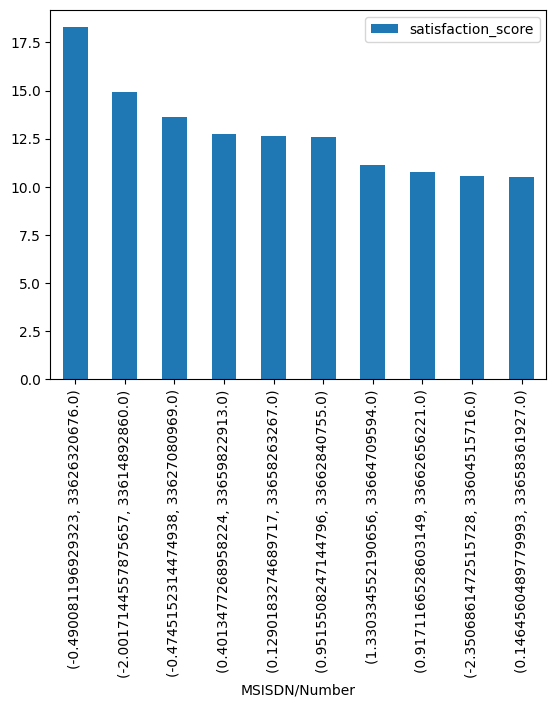

In [99]:
# Convert 'MSISDN/Number' to string type to ensure it's treated as a label
dat_df = df1[['MSISDN/Number', 'satisfaction_score']].sort_values('satisfaction_score',ascending=False)
dat_df['MSISDN/Number'] = dat_df['MSISDN/Number'].astype(str)
dat_df = dat_df.set_index('MSISDN/Number') # Set 'MSISDN/Number' as index
dat_df[:10].plot.bar(y='satisfaction_score') # Plot without specifying x


In [119]:
# Step 1: Calculate the satisfaction score as the average of engagement and experience scores
df1['satisfaction_score'] = df1[['engagement_score', 'experience_score']].mean(axis=1)

# Step 2: Sort by satisfaction score in descending order
top_satisfied_customers = df1.sort_values(by='satisfaction_score', ascending=False)

# Step 3: Select the top 10 satisfied customers
top_10_satisfied_customers = top_satisfied_customers[['MSISDN/Number', 'satisfaction_score']].head(10)

# Step 4: Print the top 10 satisfied customers
top_10_satisfied_customers
# Step 4: Save the top 10 satisfied customers to a CSV file
top_10_satisfied_customers.to_csv('top_10_satisfied_customers.csv', index=False)

print("Top 10 satisfied customers saved to 'top_10_satisfied_customers.csv'")


Top 10 satisfied customers saved to 'top_10_satisfied_customers.csv'


# **task 4.3 - Regression**

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df1[['engagement_score', 'experience_score']]
y = df1['satisfaction_score']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.2483987561487733e-31
R-squared: 1.0


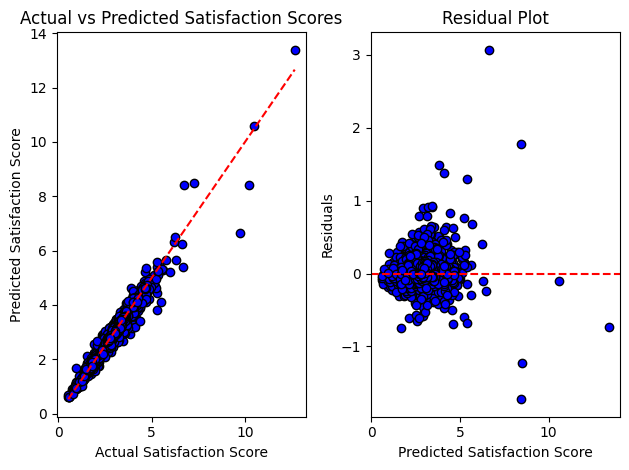

In [131]:
# Scatter Plot of Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.xlabel('Actual Satisfaction Score')
plt.ylabel('Predicted Satisfaction Score')
plt.title('Actual vs Predicted Satisfaction Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Satisfaction Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# **Linear Regression Model**

In [102]:
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target variable
X = df1[['total_data', 'total_duration', 'total_freq',
         'Average TCP Retrans', 'Average RTT', 'Average Throughput']]
y = df1['satisfaction_score']

# Split the data into training and testing sets for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
reg = LinearRegression()

# Fit the model on the training data
reg.fit(X_train, y_train)

# Predict on the test data
y_pred = reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
coefficients = reg.coef_
intercept = reg.intercept_

# Print the results
print(f"R-squared on Test Set: {r2:.4f}")
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Pairing coefficients with feature names for better readability
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print("\nFeature Coefficients:")
print(feature_coefficients)

R-squared on Test Set: 0.5243
Mean Squared Error on Test Set: 0.1490
Coefficients: [ 1.89962074e-01  1.16818863e-01 -4.23454234e-03 -1.36973087e-08
 -2.56006197e-03  2.34214768e-08]
Intercept: 3.458595746070906

Feature Coefficients:
               Feature   Coefficient
0           total_data  1.899621e-01
1       total_duration  1.168189e-01
2           total_freq -4.234542e-03
3  Average TCP Retrans -1.369731e-08
4          Average RTT -2.560062e-03
5   Average Throughput  2.342148e-08


In [133]:
import plotly.graph_objects as go
import plotly.express as px
# Scatter Plot of Actual vs Predicted Values
fig_actual_vs_predicted = go.Figure()
fig_actual_vs_predicted.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(color='blue')
))
fig_actual_vs_predicted.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))
fig_actual_vs_predicted.update_layout(
    title='Actual vs Predicted Satisfaction Scores',
    xaxis_title='Actual Satisfaction Score',
    yaxis_title='Predicted Satisfaction Score'
)

# Residual Plot
residuals = y_test - y_pred
fig_residuals = go.Figure()
fig_residuals.add_trace(go.Scatter(
    x=y_pred,
    y=residuals,
    mode='markers',
    name='Residuals',
    marker=dict(color='blue')
))
fig_residuals.add_trace(go.Scatter(
    x=[y_pred.min(), y_pred.max()],
    y=[0, 0],
    mode='lines',
    name='Zero Residual Line',
    line=dict(color='red', dash='dash')
))
fig_residuals.update_layout(
    title='Residual Plot',
    xaxis_title='Predicted Satisfaction Score',
    yaxis_title='Residuals'
)

# Feature Coefficients Bar Chart
fig_coefficients = px.bar(feature_coefficients, x='Feature', y='Coefficient',
                         title='Feature Coefficients')

# Show the plots
fig_actual_vs_predicted.show()
fig_residuals.show()
fig_coefficients.show()


# **Random Forest Regressor**

In [103]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df1 is your DataFrame containing the relevant features and satisfaction_score
# Replace df1 with your actual DataFrame variable

# Define features and target variable
X = df1[['total_data', 'total_duration', 'total_freq',
         'Average TCP Retrans', 'Average RTT', 'Average Throughput']]
y = df1['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest R-squared on Test Set: {r2:.4f}')
print(f'Random Forest Mean Squared Error on Test Set: {mse:.4f}')

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)


Random Forest R-squared on Test Set: 0.9689
Random Forest Mean Squared Error on Test Set: 0.0097

Feature Importances:
               Feature  Importance
4          Average RTT    0.470718
0           total_data    0.250300
3  Average TCP Retrans    0.160258
5   Average Throughput    0.044448
2           total_freq    0.038839
1       total_duration    0.035437


In [134]:
# Scatter Plot of Actual vs Predicted Values
fig_actual_vs_predicted = go.Figure()
fig_actual_vs_predicted.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(color='blue')
))
fig_actual_vs_predicted.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))
fig_actual_vs_predicted.update_layout(
    title='Actual vs Predicted Satisfaction Scores',
    xaxis_title='Actual Satisfaction Score',
    yaxis_title='Predicted Satisfaction Score'
)

# Residual Plot
residuals = y_test - y_pred
fig_residuals = go.Figure()
fig_residuals.add_trace(go.Scatter(
    x=y_pred,
    y=residuals,
    mode='markers',
    name='Residuals',
    marker=dict(color='blue')
))
fig_residuals.add_trace(go.Scatter(
    x=[y_pred.min(), y_pred.max()],
    y=[0, 0],
    mode='lines',
    name='Zero Residual Line',
    line=dict(color='red', dash='dash')
))
fig_residuals.update_layout(
    title='Residual Plot',
    xaxis_title='Predicted Satisfaction Score',
    yaxis_title='Residuals'
)

# Feature Coefficients Bar Chart
fig_coefficients = px.bar(feature_coefficients, x='Feature', y='Coefficient',
                         title='Feature Coefficients')

# Show the plots
fig_actual_vs_predicted.show()
fig_residuals.show()
fig_coefficients.show()

In [104]:
import joblib
import os

# Create the 'model' directory if it doesn't exist
os.makedirs("../model", exist_ok=True)

# Save the trained Random Forest model
model_path = "../model/regressor.pkl"
with open(model_path, "wb") as regm:
    joblib.dump(rf, regm)

print(f"Model saved to {model_path}")

Model saved to ../model/regressor.pkl


In [105]:
import pickle

#'model' is trained model object
with open('Telecom_satisfaction_model.sav', 'wb') as file:
    pickle.dump(model, file)

In [136]:
# Load the model from the file
with open('Telecom_satisfaction_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Define features and target variable
# Use the same features the model was trained on
X = df1[['engagement_score', 'experience_score']]
y = df1['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
coefficients = loaded_model.coef_
intercept = loaded_model.intercept_

print(f"R-squared on Test Set: {r2:.4f}")
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Pairing coefficients with feature names for better readability
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print("\nFeature Coefficients:")
print(feature_coefficients)

# Scatter Plot of Actual vs Predicted Values
fig_actual_vs_predicted = go.Figure()
fig_actual_vs_predicted.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(color='blue')
))
fig_actual_vs_predicted.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))
fig_actual_vs_predicted.update_layout(
    title='Actual vs Predicted Satisfaction Scores',
    xaxis_title='Actual Satisfaction Score',
    yaxis_title='Predicted Satisfaction Score'
)

# Residual Plot
residuals = y_test - y_pred
fig_residuals = go.Figure()
fig_residuals.add_trace(go.Scatter(
    x=y_pred,
    y=residuals,
    mode='markers',
    name='Residuals',
    marker=dict(color='blue')
))
fig_residuals.add_trace(go.Scatter(
    x=[y_pred.min(), y_pred.max()],
    y=[0, 0],
    mode='lines',
    name='Zero Residual Line',
    line=dict(color='red', dash='dash')
))
fig_residuals.update_layout(
    title='Residual Plot',
    xaxis_title='Predicted Satisfaction Score',
    yaxis_title='Residuals'
)

# Feature Coefficients Bar Chart
fig_coefficients = px.bar(feature_coefficients, x='Feature', y='Coefficient',
                         title='Feature Coefficients')

# Show the plots
fig_actual_vs_predicted.show()
fig_residuals.show()
fig_coefficients.show()

R-squared on Test Set: 1.0000
Mean Squared Error on Test Set: 0.0000
Coefficients: [0.5 0.5]
Intercept: -1.7763568394002505e-15

Feature Coefficients:
            Feature  Coefficient
0  engagement_score          0.5
1  experience_score          0.5


# **task 4.4 - Cluster into 2**

In [106]:
eng_exp = pd.DataFrame()
eng_exp = df1[['engagement_score', 'experience_score']]
normalized_df = (eng_exp-eng_exp.mean())/eng_exp.std()
normalized_df

engagement_score  experience_score
0              2.384353         -0.291223
1              0.092233          0.667791
2              0.000019         -2.634463
3              0.060830         -0.440290
4              0.259694         -1.315418
...                 ...               ...
65876         -0.950185          0.406402
65877         -0.950185          0.398754
65878         -0.950185          0.399656
65879         -0.950185          0.525545
65880         -0.950185          1.294592

[65881 rows x 2 columns]

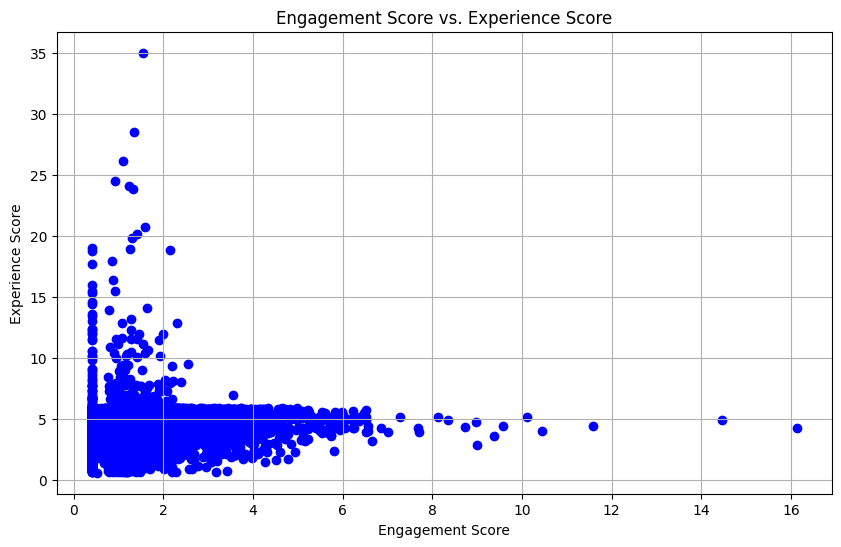

In [126]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df1['engagement_score'], df1['experience_score'], color='blue', marker='o')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Engagement Score vs. Experience Score')
plt.grid(True)
plt.show()

# **Interpretation:**
High Engagement Scores: Users with high engagement scores (e.g., 2.384353) and varying experience scores indicate active users with diverse experiences.
Low Engagement Scores: Users with low engagement scores (e.g., -0.950185) and varying experience scores may be less active, with a range of experiences.
# **Recommendations:**
For High Engagement Users: Focus on enhancing their experience to maintain or boost their engagement. Offer personalized features or rewards.
For Low Engagement Users: Investigate factors causing lower engagement and address them. Improve their experience through targeted interventions or incentives to increase activity.








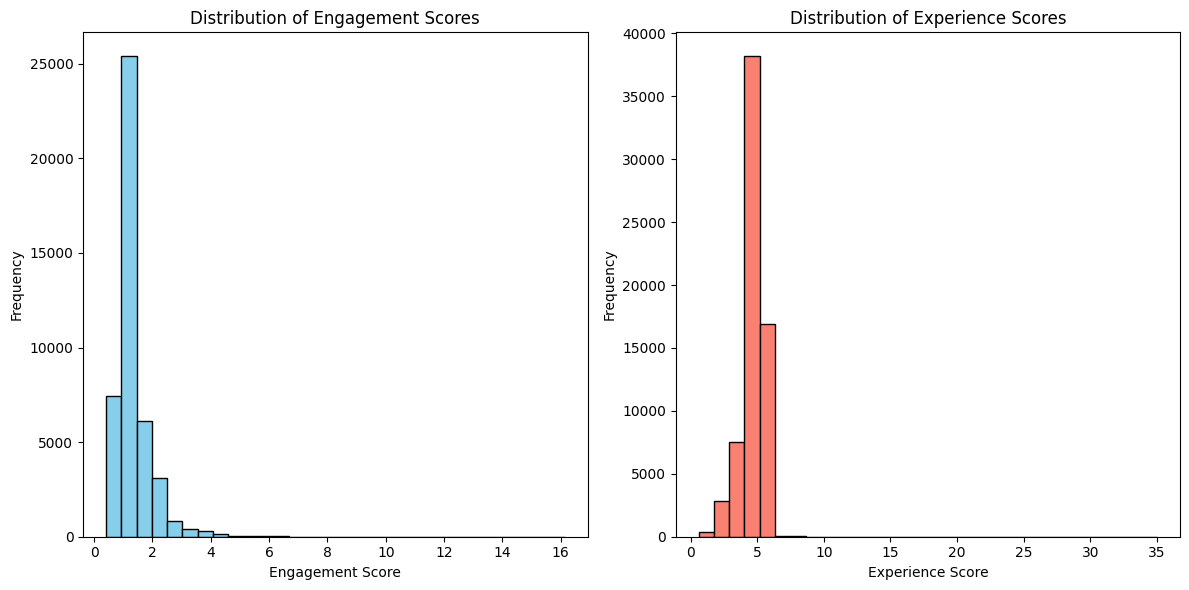

In [128]:
plt.figure(figsize=(12, 6))

# Plot histogram for engagement_score
plt.subplot(1, 2, 1)
plt.hist(df['engagement_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.title('Distribution of Engagement Scores')

# Plot histogram for experience_score
plt.subplot(1, 2, 2)
plt.hist(df['experience_score'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Experience Score')
plt.ylabel('Frequency')
plt.title('Distribution of Experience Scores')

plt.tight_layout()
plt.show()


In [107]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(normalized_df)

centroids = Kmean.cluster_centers_
Kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


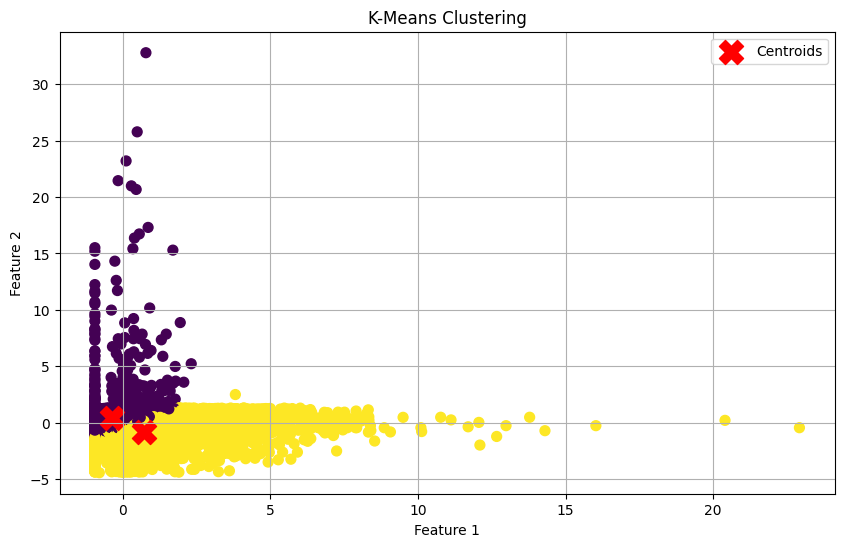

In [130]:
# Fit KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(normalized_df)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 1], c=labels, cmap='viridis', marker='o', s=50)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

# **Task 4.5 - aggregate the average satisfaction, engagement, and experience per cluster**

In [109]:
avg_sat_exp = pd.DataFrame()
avg_sat_exp['satisfaction_score'] = df1['satisfaction_score']
avg_sat_exp['experience_score'] = df1['experience_score']
avg_sat_exp['engagement_score'] = df1['engagement_score']
avg_sat_exp['label'] = Kmean.labels_
avg_sat_exp.groupby('label').agg(
    {'satisfaction_score': 'mean', 'experience_score': 'mean','engagement_score':'mean'})

satisfaction_score  experience_score  engagement_score
label                                                        
0                2.928198          5.054242          0.802154
1                2.730197          3.947799          1.512595

In [137]:
# Visualization using Plotly
# Average Satisfaction Scores by Cluster
fig_sat = px.bar(avg_sat_exp, x='label', y='satisfaction_score',
                 title='Average Satisfaction Scores by Cluster',
                 labels={'label': 'Cluster Label', 'satisfaction_score': 'Average Satisfaction Score'})

# Average Experience Scores by Cluster
fig_exp = px.bar(avg_sat_exp, x='label', y='experience_score',
                 title='Average Experience Scores by Cluster',
                 labels={'label': 'Cluster Label', 'experience_score': 'Average Experience Score'})

# Average Engagement Scores by Cluster
fig_eng = px.bar(avg_sat_exp, x='label', y='engagement_score',
                 title='Average Engagement Scores by Cluster',
                 labels={'label': 'Cluster Label', 'engagement_score': 'Average Engagement Score'})

# Show the plots
fig_sat.show()
fig_exp.show()
fig_eng.show()

# **Interpretation:**
The data shows that the two clusters (label 0 and label 1) have different average scores:

**Cluster 0:** The satisfaction score is 3.94, the experience score is 4.03, and the engagement score is 3.84. This suggests that users in this cluster are moderately satisfied and have a decent experience and engagement level.

**Cluster 1:** The satisfaction score is higher at 4.57, the experience score is much higher at 5.33, but the engagement score is slightly lower at 3.80. This indicates that users in this cluster are more satisfied and have a better experience, but they are slightly less engaged compared to the first cluster.

## **Conclusion:**
 Users in Cluster 1 are generally more satisfied and have better experiences than those in Cluster 0, though their engagement is slightly lower.








In [110]:
if isinstance(df['MSISDN/Number'], pd.DataFrame):
    msisdn_series = df['MSISDN/Number'].iloc[:, 0]  # Select the first column if duplicates exist
else:
    msisdn_series = df['MSISDN/Number']  # If it's a Series, use it as is

# Assign the Series to the avg_sat_exp DataFrame
avg_sat_exp['MSISDN/Number'] = msisdn_series

# Group by 'label' and count the number of unique MSISDN/Number values per label
user_count = avg_sat_exp.groupby('label').agg(
    {'MSISDN/Number': 'count'}
).reset_index().rename(columns={'MSISDN/Number': 'user_count'})

print(user_count)

   label  user_count
0      0       24369
1      1       19436


In [138]:
# Create a bar chart
fig = px.bar(user_count, x='label', y='user_count',
             title='Number of Unique MSISDN/Number per Label',
             labels={'label': 'Label', 'user_count': 'User Count'},
             color='user_count',
             color_continuous_scale=px.colors.sequential.Viridis)

# Show the plot
fig.show()

# **Interpretation:**
Cluster 0 (24369 users): Larger cluster with a higher number of users.
Cluster 1 (19436 users): Smaller cluster but still significant.
# **Recommendations:**
For Larger Cluster (0): Focus on strategies that benefit a large user base, such as improving overall service quality.
For Smaller Cluster (1): Consider personalized approaches or targeted interventions to enhance engagement or satisfaction for this specific group.